En R se generan número pseudoaleatorios con runif

In [2]:
runif(10)

[1] 0.78017199 0.50578817 0.47883759 0.18682997 0.24001083 0.75827806
 [7] 0.98562223 0.03796312 0.40413194 0.80353029

Se pueden graficar histogramas de estos resultados

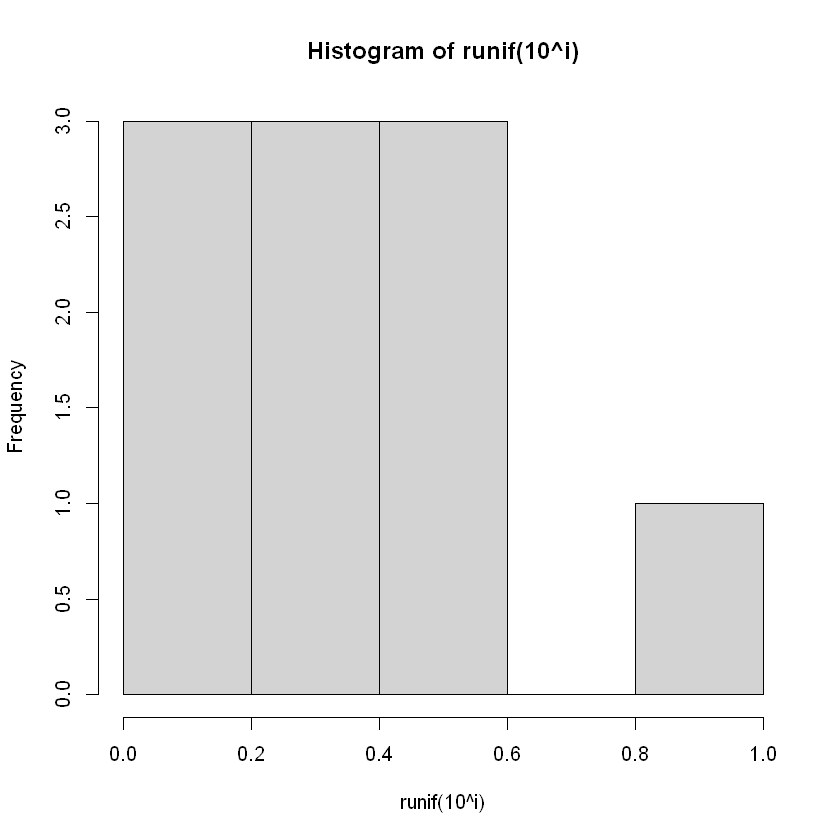

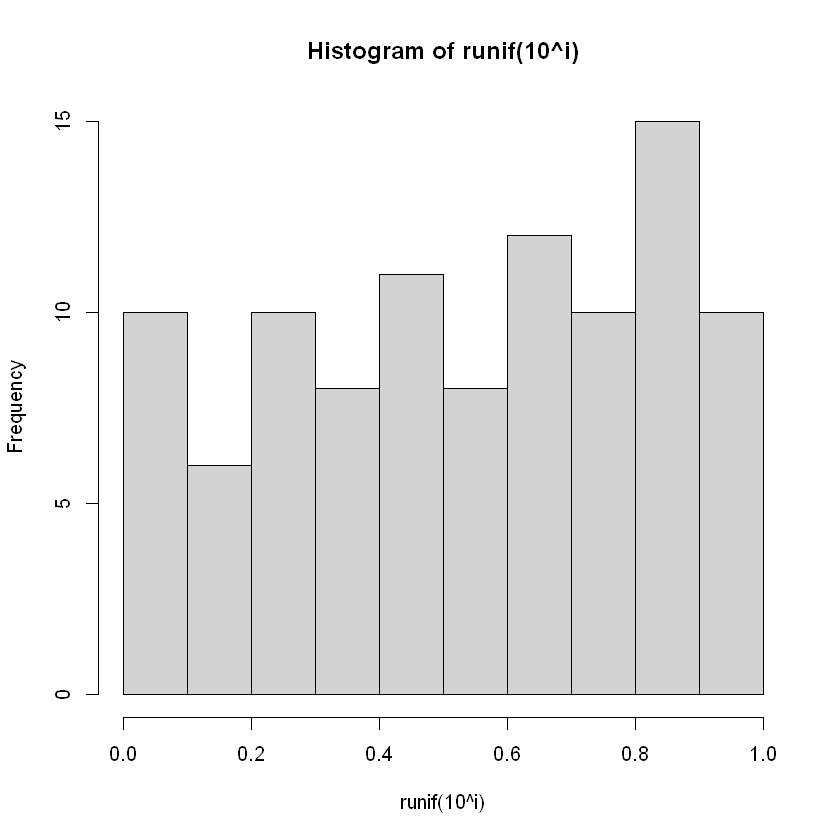

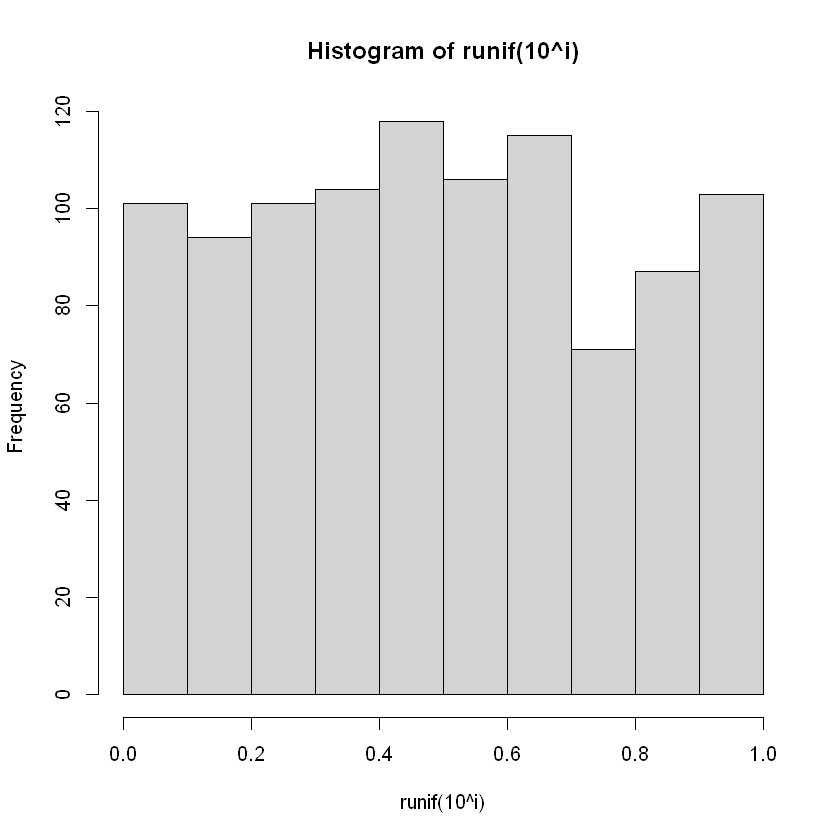

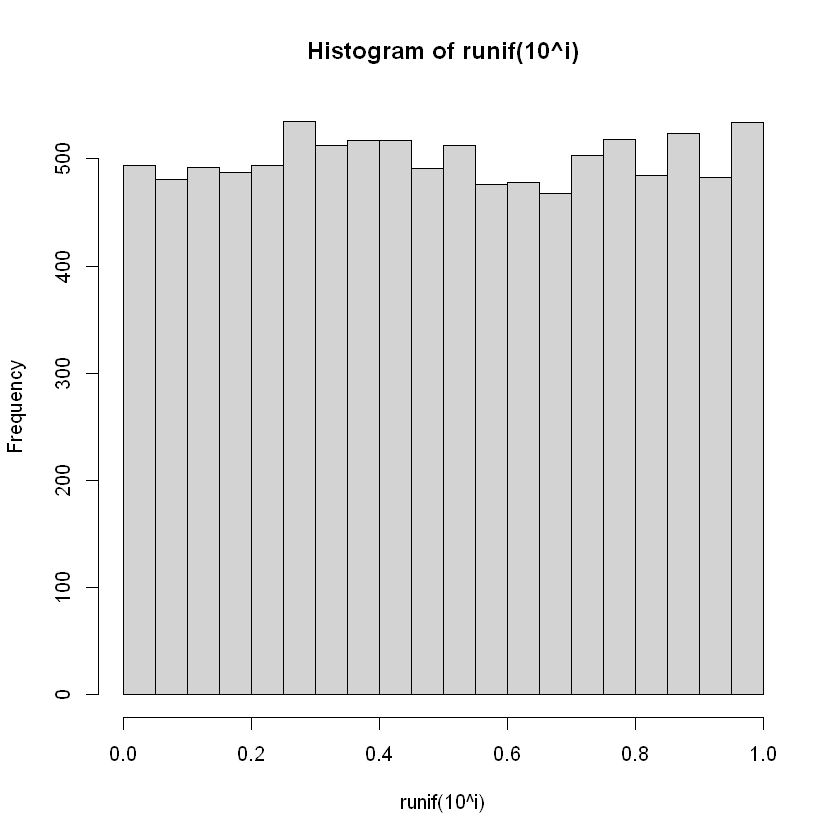

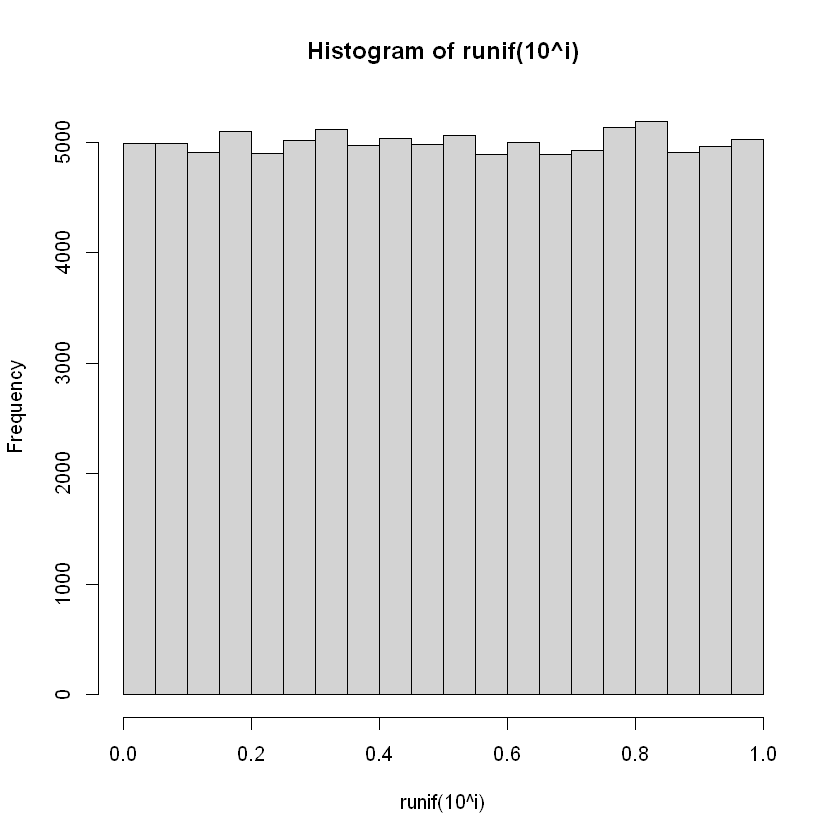

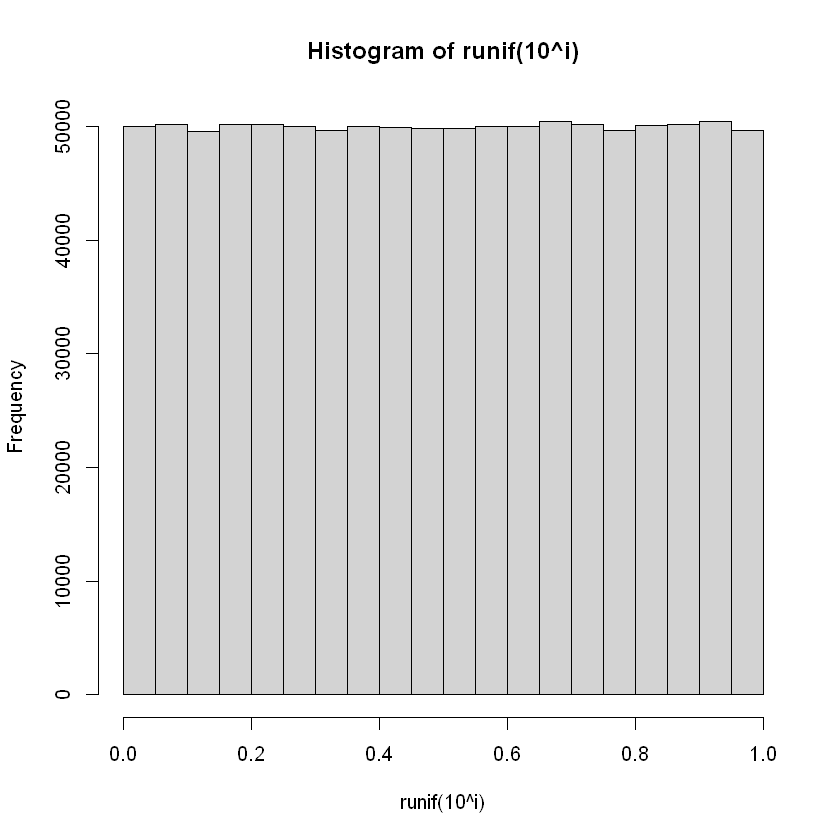

In [6]:
for (i in 1:6){
    hist(runif(10^i))
}

Las barras de histogramas se vuelven más homogéneas conforme crece el número de repeticiones. También se puede compara la cantidad de veces que uno de estos valores es menor a un valor dado, graficándose en dos barras la frecuencia de valores. La de la izquierda corresponde a la de los valores que son menores a una $p$ dada. Los de la derecha son mayores.

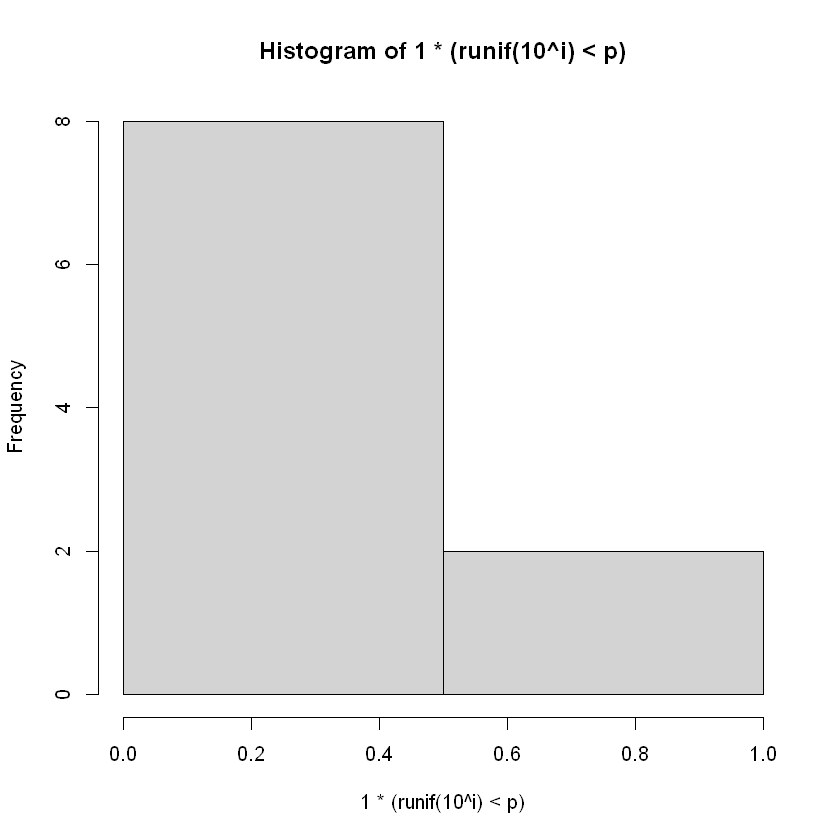

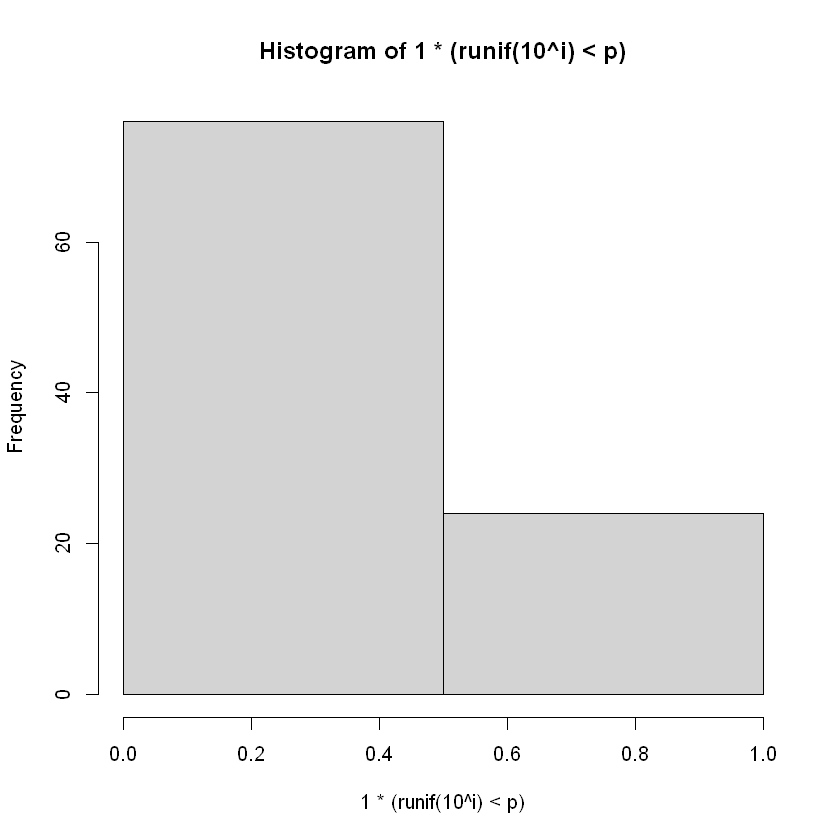

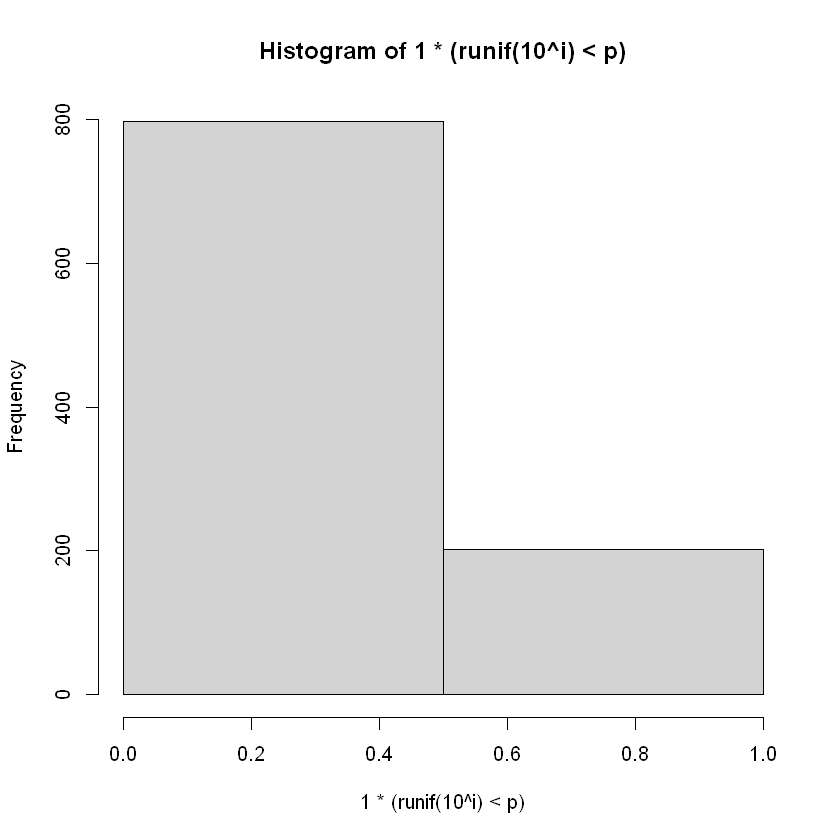

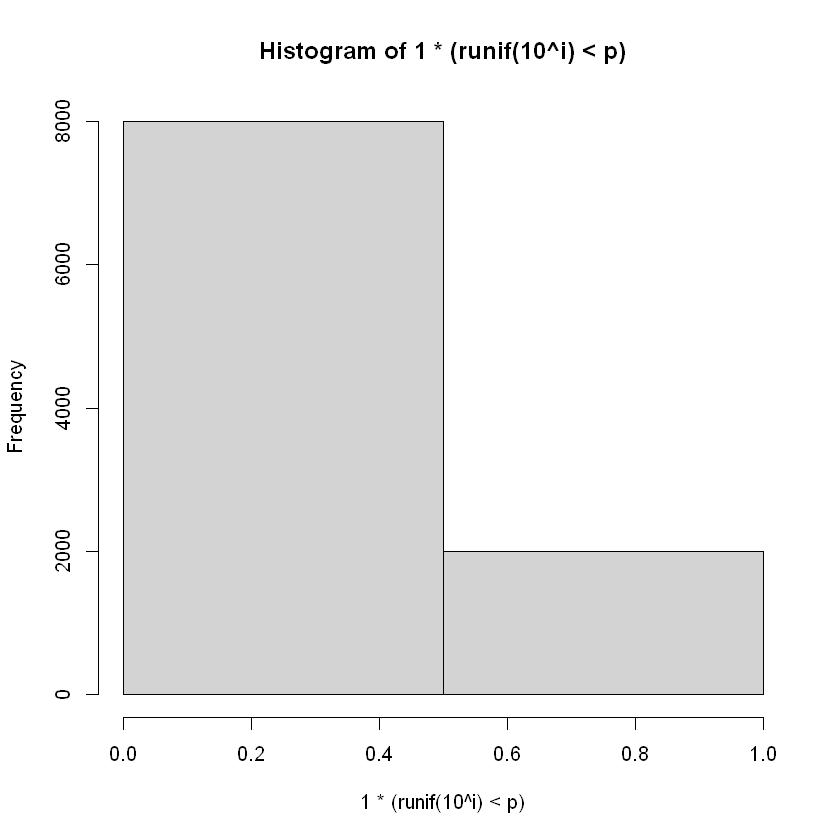

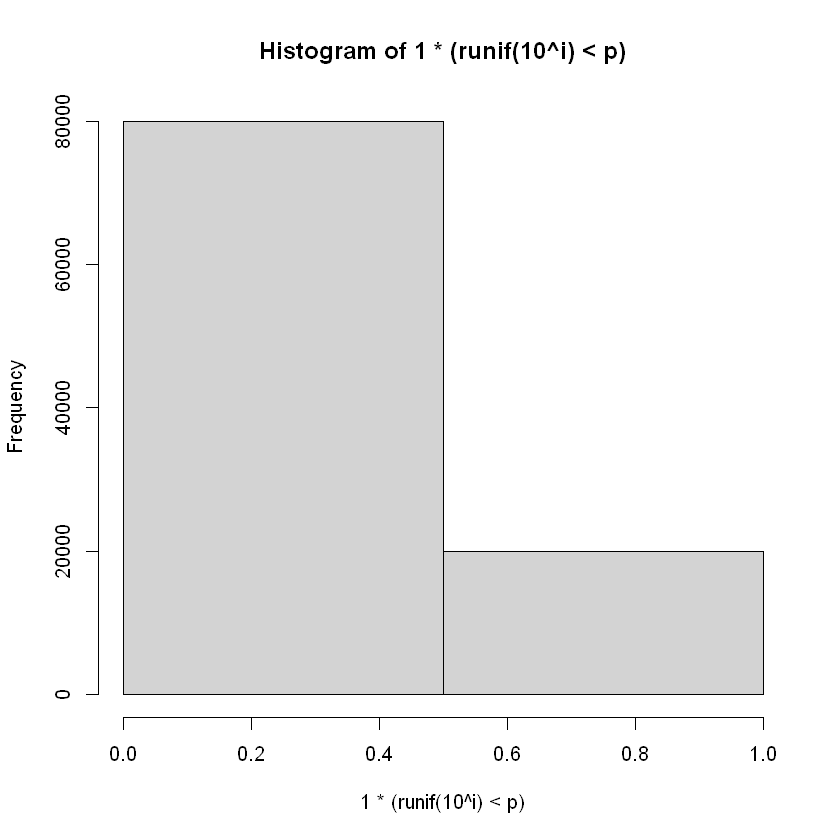

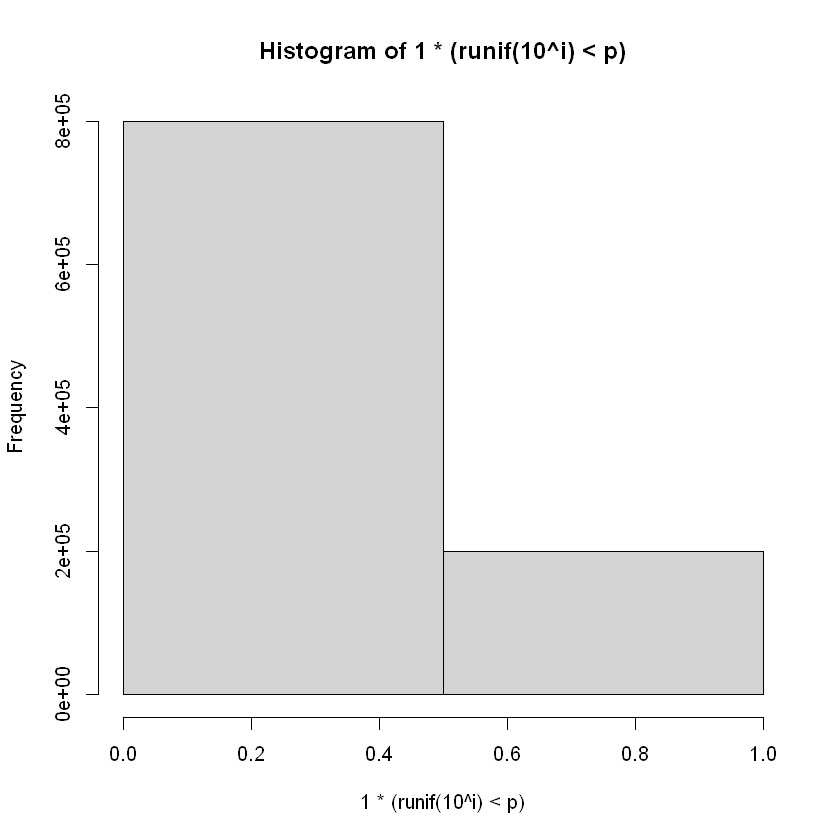

In [31]:
p = 0.2
for (i in 1:6){
    # https://rpubs.com/rodolfo_mendes/change-number-bins-histogram
    hist(1 * (runif(10^i) < p), breaks=2)
}

## Distribución geométrica

Se revisa cuántas veces se tiene que repetir un experimento hasta que sucede un evento.

In [67]:
geometrica = function(p){ # recibe una probabilidad entre 0 y 1
    veces = 0

    while(TRUE){
        veces = veces + 1
        b = runif(1) < p # Se repite un experimento de Bernoulli
        if (b == TRUE){ # hasta que se cumple el experimento
            break
        }
    }
    return (veces)
}

Se repite una cantidad $r$ de veces y los resultados se grafican en un histograma.

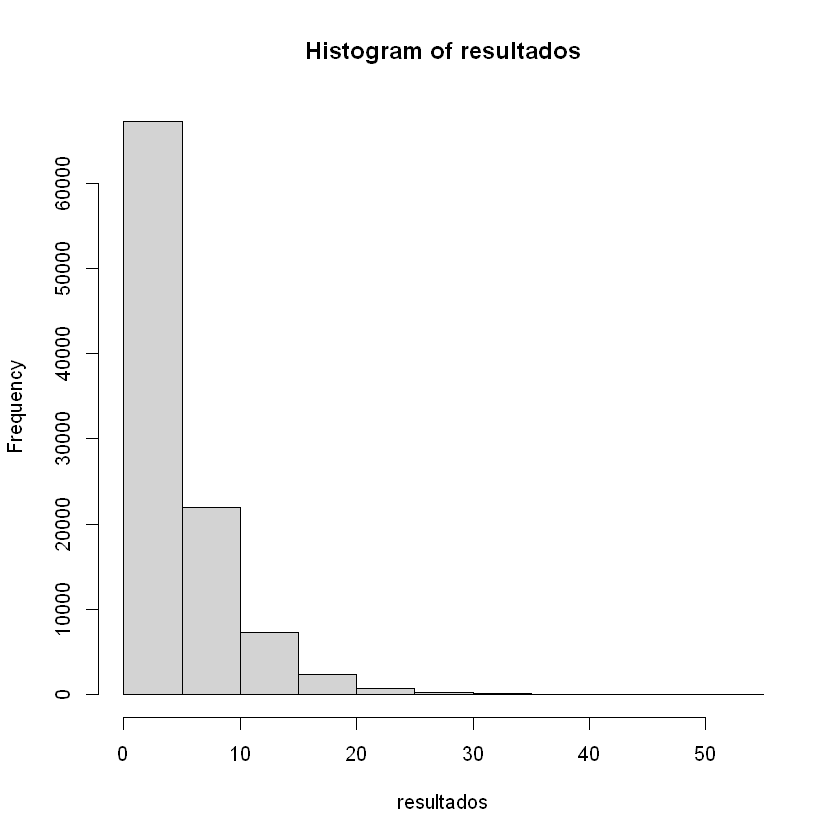

In [75]:
resultados = c()
r = 10^5

p = 0.2
for(i in 1:r){
    resultados = c(resultados, geometrica(p))
}

hist(resultados)

Esto se puede comparar con la función integrada `rgeom`

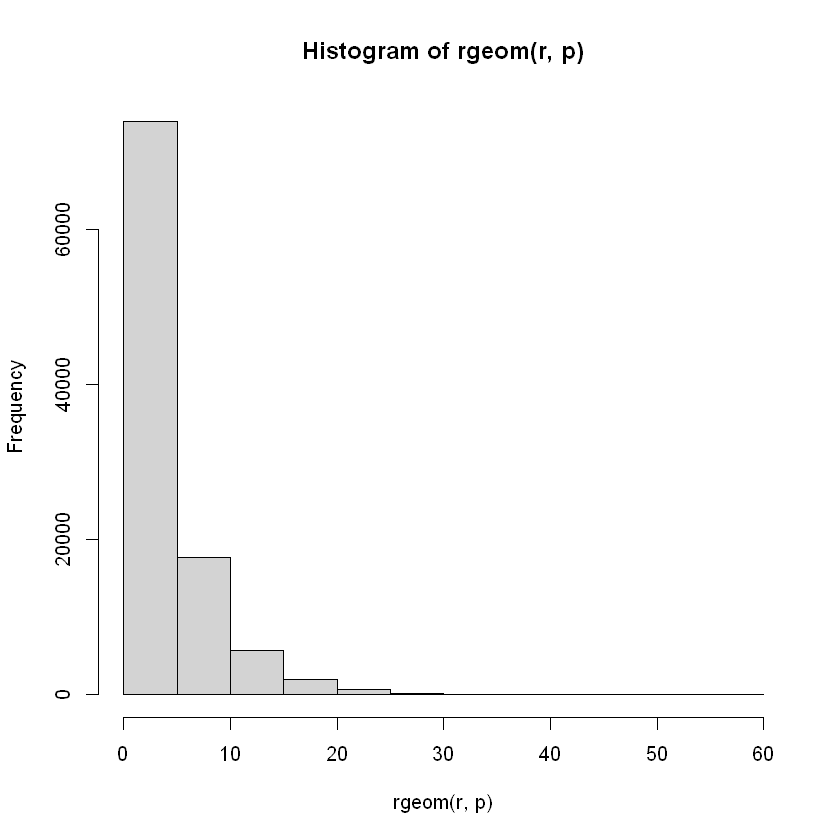

In [76]:
hist(rgeom(r, p))

## Distribución binomial negativa

Ésta calcula la probabilidad de que se dén $k$ veces un evento en $r$ repeticiones de un experimento.

In [111]:
binom_negativa = function(p, k, fracasos = FALSE){ # Recibe una probabilidad y una cantidad de veces que se desea que se repita un experimento
    veces = 0
    exitos = 0

    while(TRUE){
        veces = veces + 1
        b = runif(1) < p # Se repite un experimento de Bernoulli
        if (b == TRUE){ # hasta que se cumple el experimento
            exitos = exitos + 1
            if (exitos == k){
                break
            }
        }
    }
    if (fracasos){
        return (veces - exitos)
    } else {
        return (veces)
    }
}

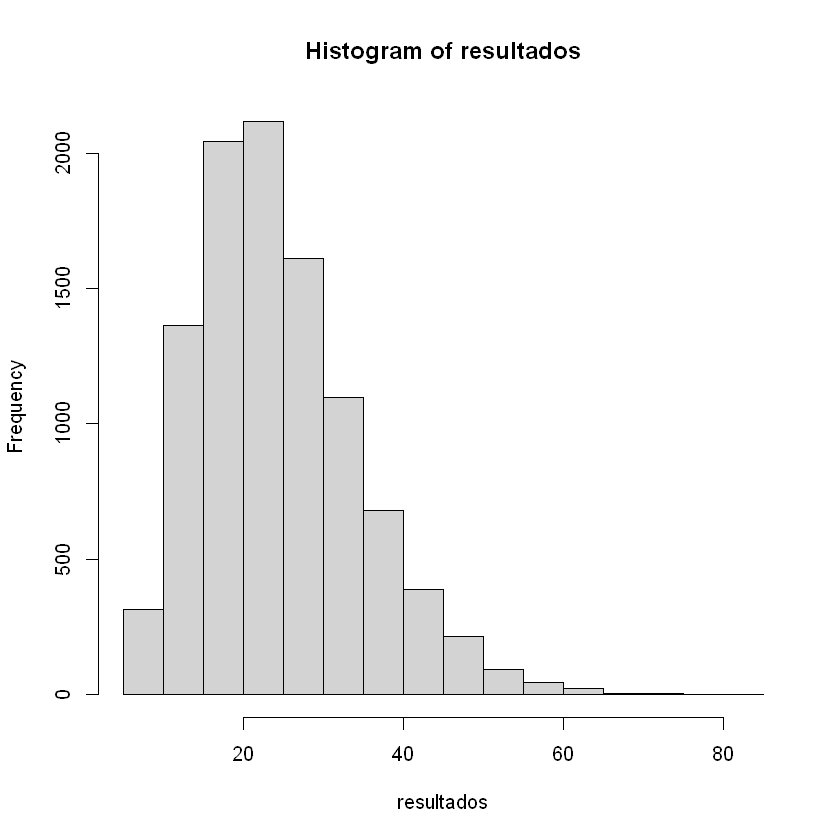

In [110]:
resultados = c()
r = 10^4

k = 5
p = 0.2
for(i in 1:r){
    resultados = c(resultados, binom_negativa(p, k))
}

hist(resultados)

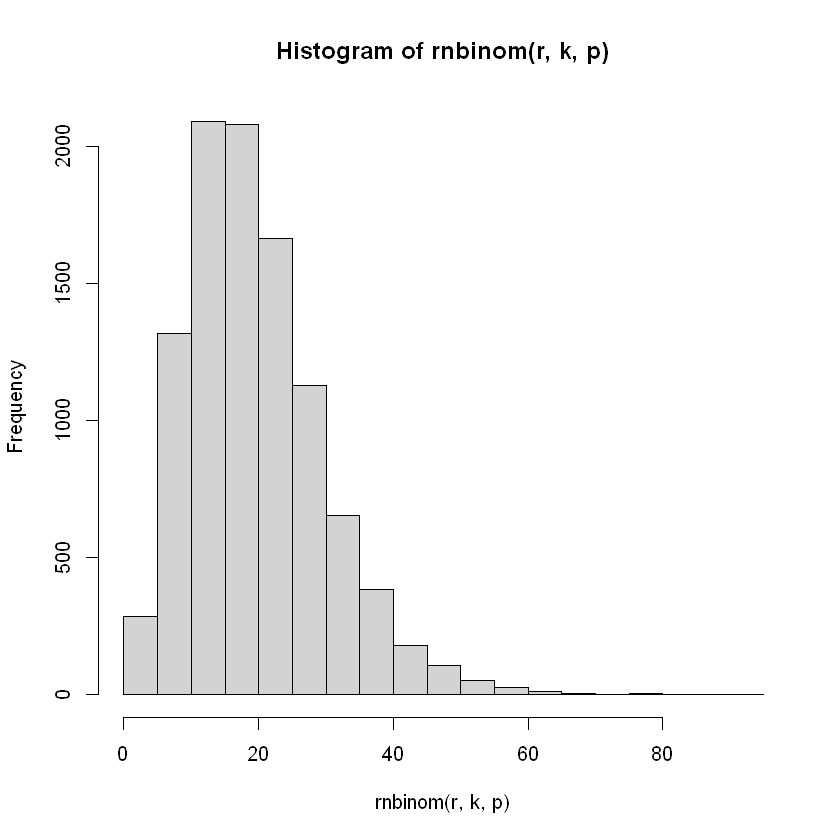

In [106]:
hist(rnbinom(r, k, p))

Si se desea conocer la cantidad de fracasos, se pueden restar del contador los éxitos y graficar los resultados, lo que se logra sólo pasando un tercer parámetro como verdadero (`T`) a la función `binom_negativa`.

## Distribución binomial

Define la cantidad de éxitos en cierta cantidad de intentos $i$.

In [121]:
binomial = function(p, i){
    exitos = 0

    for (j in 1:i){
        b = runif(1) < p # Se repite un experimento de Bernoulli
        if (b == TRUE){ # hasta que se cumple el experimento
            exitos = exitos + 1
        }
    }
    return (exitos)
}

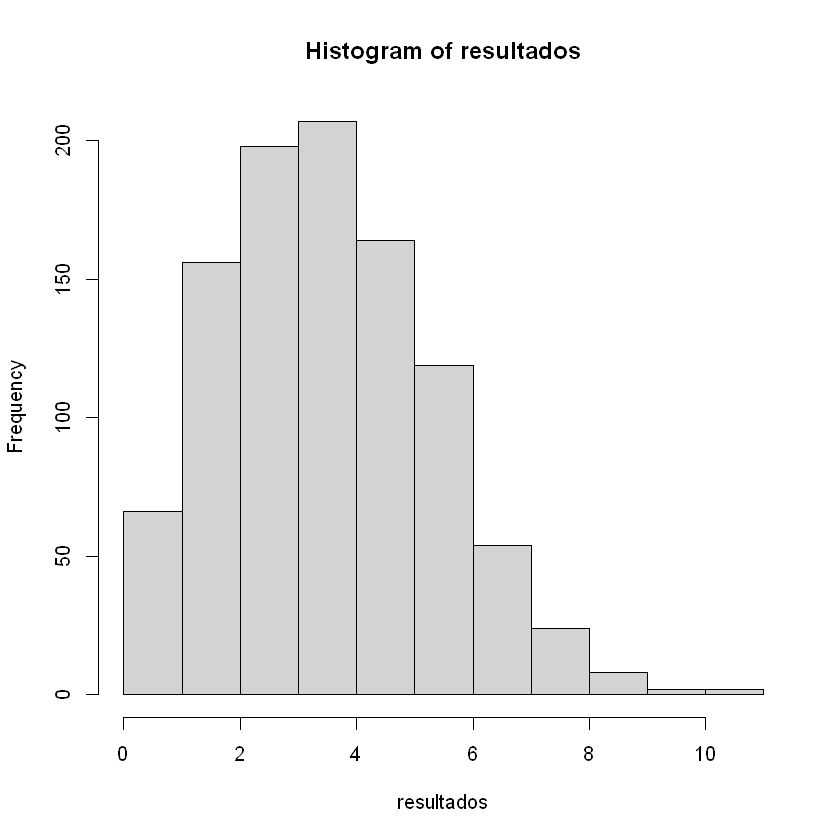

In [128]:
resultados = c()
r = 10^3

i = 20
p = 0.2
for(j in 1:r){
    resultados = c(resultados, binomial(p, i))
}

hist(resultados)